<a href="https://colab.research.google.com/github/lucasef27/license-plate-recognition/blob/main/Placa_de_Carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

imagPath = 'placa.webp'
img = cv2.imread(imagPath)

imagemPB = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face = face_cascade.detectMultiScale(imagemPB, scaleFactor=1.1, minNeighbors=4, minSize=(40,40))

for (x, y, w, h) in face:
  cv2.rectangle(img, (x,y), (x + w, y + h), (0,255,0), 4)


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# extract the number plate from the grayscale image
number_plate = img[y:y + h, x:x + w]

(-0.5, 272.5, 90.5, -0.5)

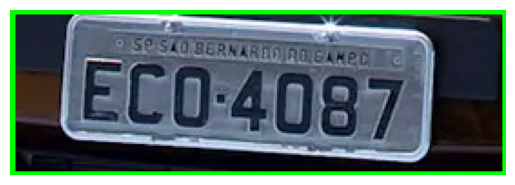

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(number_plate)
plt.axis('off')

(-0.5, 1199.5, 761.5, -0.5)

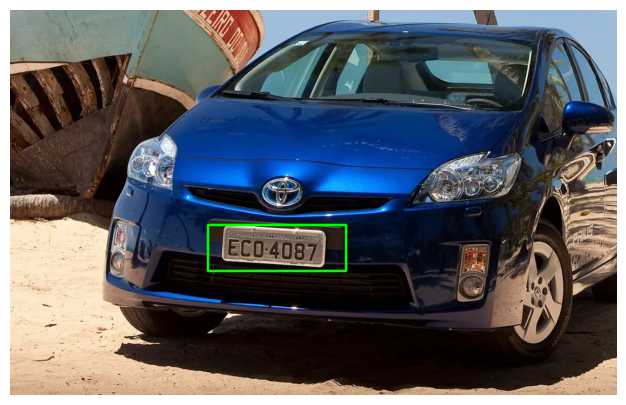

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.imshow(img_rgb)
plt.axis('off')

In [ ]:
!pip install keras_ocr
import keras_ocr


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 3s 3s/step


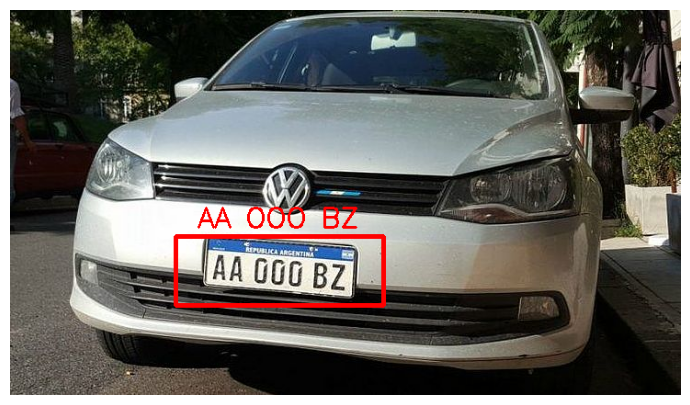

In [ ]:
classificador_placas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

caminho_imagem = 'placa1.jpg'
imagem = cv2.imread(caminho_imagem)

imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

placas = classificador_placas.detectMultiScale(imagem_cinza, scaleFactor=1.05, minNeighbors=7)

pipeline = keras_ocr.pipeline.Pipeline()

valores_placas = []

for (x, y, w, h) in placas:
    imagem_placa = imagem[y:y + h, x:x + w]

    previsoes = pipeline.recognize([imagem_placa])
    texto_reconhecido = " ".join([palavra[0].upper() for palavra in previsoes[0]])

    valores_placas.append(texto_reconhecido)

    cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 0, 255), 4)

    fonte = cv2.FONT_HERSHEY_SIMPLEX
    escala_fonte = 1.0
    cor_fonte = (0, 0, 255)
    espessura_fonte = 2
    tamanho_texto = cv2.getTextSize(texto_reconhecido, fonte, escala_fonte, espessura_fonte)[0]
    x_texto = x + (w - tamanho_texto[0]) // 2
    y_texto = y - 10

    cv2.putText(imagem, texto_reconhecido, (x_texto, y_texto), fonte, escala_fonte, cor_fonte, espessura_fonte)

imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 5))
plt.imshow(imagem_rgb)
plt.axis('off')
plt.show()